In [1]:
library(ggplot2)

In [2]:
coef = c(4.955, 1.806, 0.110)
se = c(2.317, 2.307, 2.143)
df = 196

for (i in 1:length(coef)) {
    for (j in i:length(coef)) {
        if (i != j) {
            cat("comparison of groups", i, "and", j, "\n")
            se_diff = sqrt(se[i]^2 + se[j]^2)
            diff = coef[i] - coef[j]
            t_stat = diff / se_diff
            p_value = 2 * pt(-abs(t_stat), df)
            cat("t-statistic:", t_stat, "\n")
            cat("p-value:", p_value, "\n")
        }
    }
}


comparison of groups 1 and 2 
t-statistic: 0.9630943 
p-value: 0.3366869 
comparison of groups 1 and 3 
t-statistic: 1.535125 
p-value: 0.1263658 
comparison of groups 2 and 3 
t-statistic: 0.5386245 
p-value: 0.5907572 


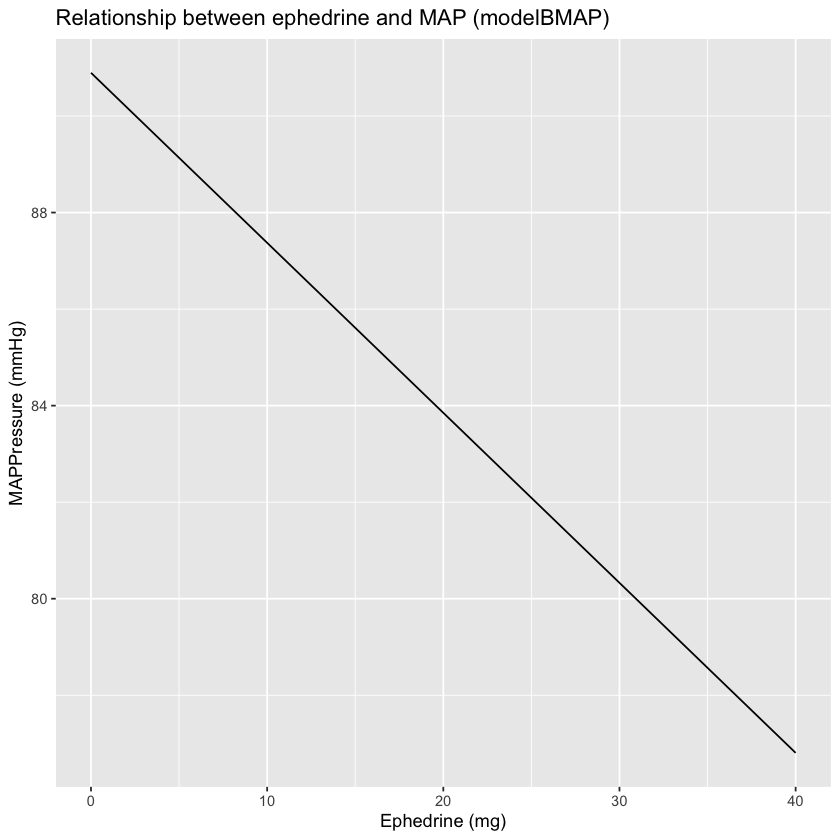

In [3]:
beta_0 = 90.89565
beta_1 = -0.35223

x = c(0, 40)
y = beta_0 + beta_1 * x

ggplot() +
    geom_line(aes(x = x, y = y)) +
    labs(
        x = "Ephedrine (mg)",
        y = "MAPPressure (mmHg)",
        title = "Relationship between ephedrine and MAP (modelBMAP)"
    )


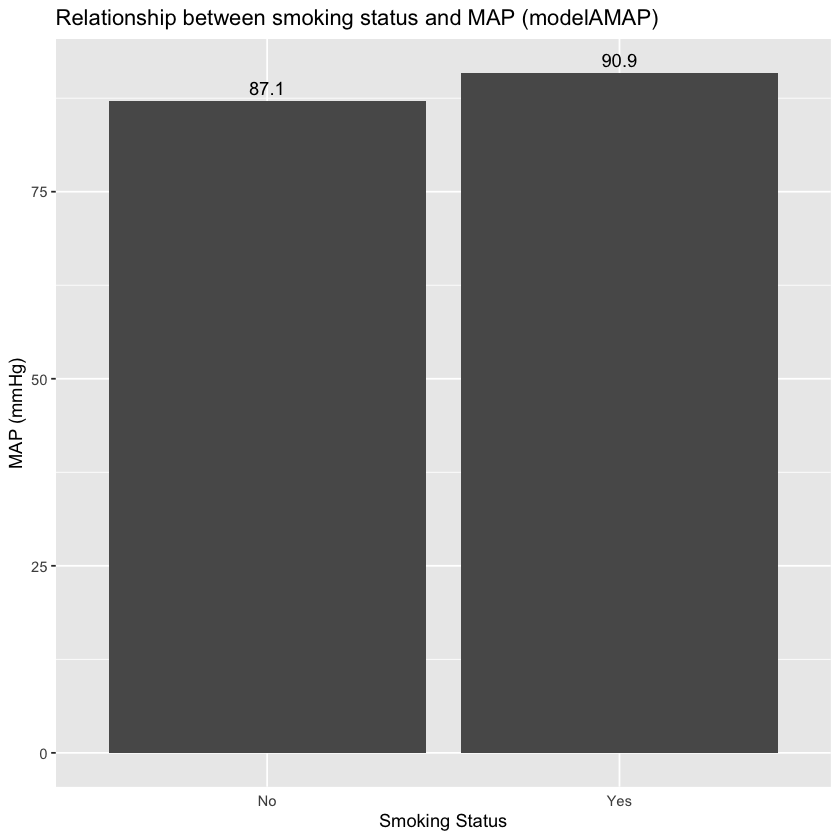

In [4]:
beta_0 = 87.137
beta_1 = 3.757

x = c("No", "Yes")
y = c(beta_0, beta_0 + beta_1)

ggplot() +
    geom_bar(aes(x = x, y = y), stat = "identity") +
    geom_text(aes(x = x, y = y, label = round(y, 1)), vjust = -0.5) +
    labs(
        x = "Smoking Status",
        y = "MAP (mmHg)",
        title = "Relationship between smoking status and MAP (modelAMAP)"
    ) +
    theme(axis.ticks.x = element_blank())

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


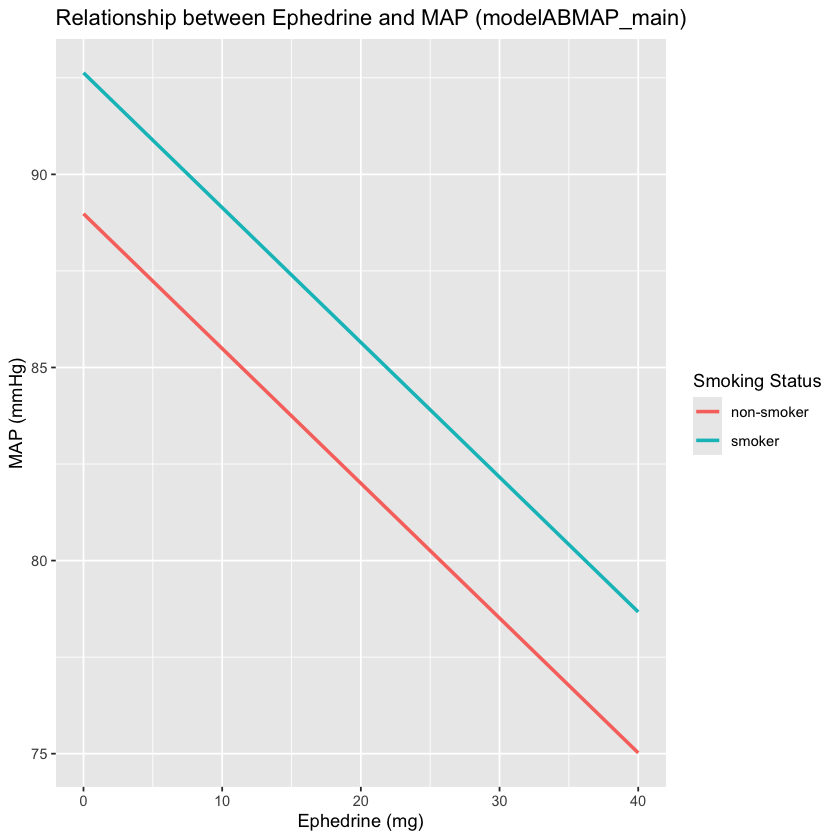

In [5]:
intercept <- 88.9814
slope <- -0.3490
smoking_intercept <- 3.6491

x = c(0, 40)
y_non_smoker = intercept + slope * x
y_smoker = intercept + slope * x + smoking_intercept

df = data.frame(
  x = rep(x, 2),
  y = c(y_non_smoker, y_smoker),
  SmokingStatus = rep(c("non-smoker", "smoker"), each = length(x))
)

ggplot(df, aes(x = x, y = y, color = SmokingStatus)) +
  geom_line(size = 1) +
  labs(
    x = "Ephedrine (mg)",
    y = "MAP (mmHg)",
    title = "Relationship between Ephedrine and MAP (modelABMAP_main)",
    color = "Smoking Status"
  )


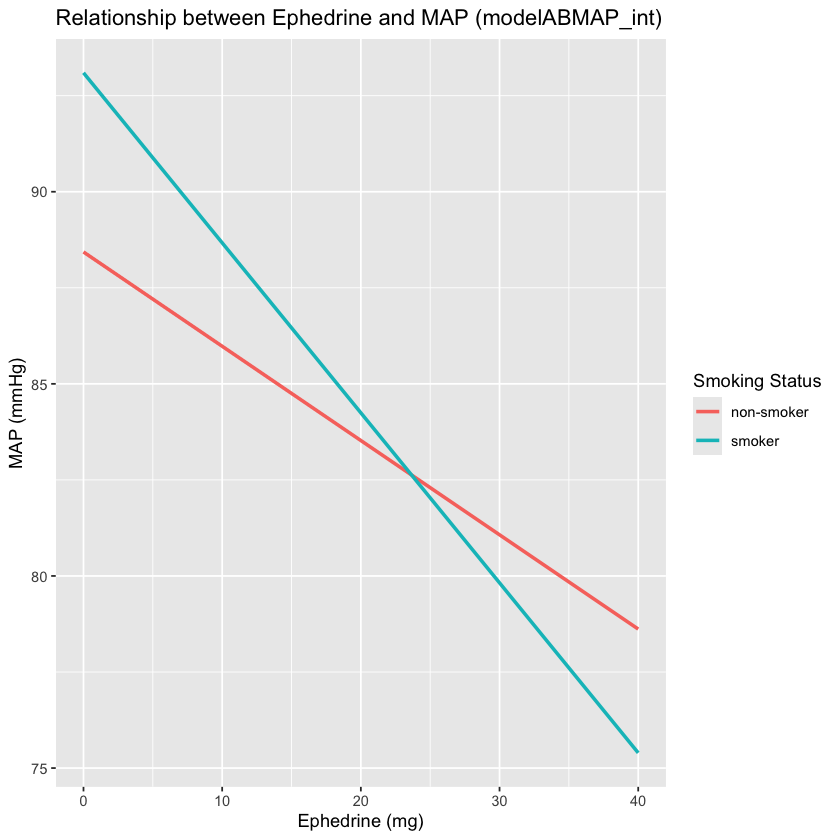

In [6]:
intercept <- 88.4338
slope <- -0.2454
smoking_intercept <- 4.6621
smoking_slope <- -0.1971

x = c(0, 40)
y_non_smoker = intercept + slope * x
y_smoker = (intercept + smoking_intercept) + (slope + smoking_slope) * x

df = data.frame(
  x = rep(x, 2),
  y = c(y_non_smoker, y_smoker),
  SmokingStatus = rep(c("non-smoker", "smoker"), each = length(x))
)

ggplot(df, aes(x = x, y = y, color = SmokingStatus)) +
  geom_line(size = 1) +
  labs(
    x = "Ephedrine (mg)",
    y = "MAP (mmHg)",
    title = "Relationship between Ephedrine and MAP (modelABMAP_int)",
    color = "Smoking Status"
  )

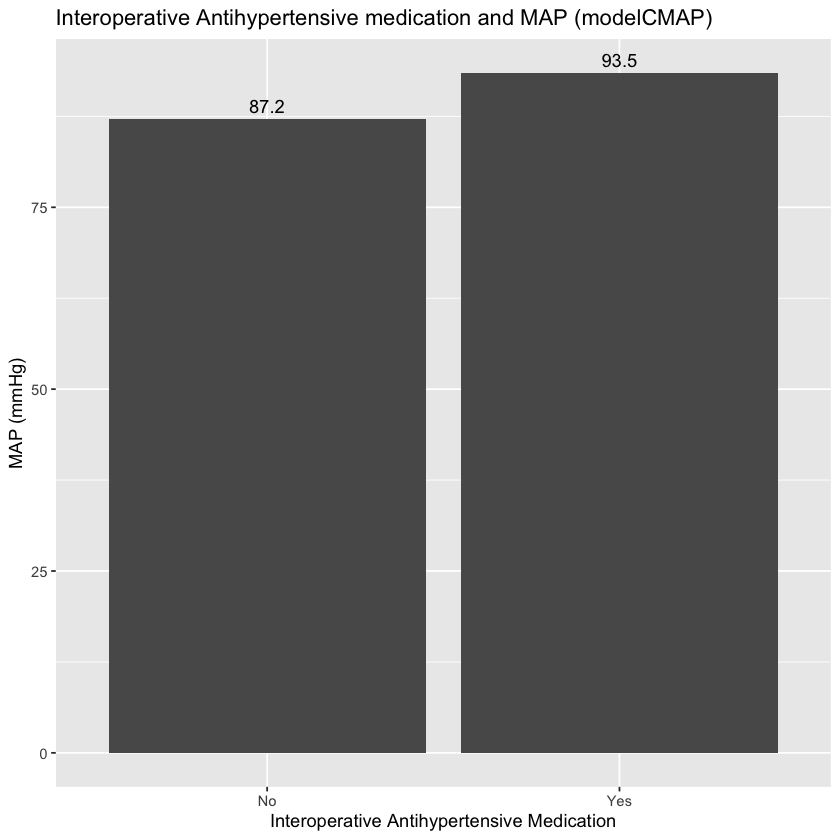

In [7]:
beta_0 = 87.1588
beta_1 = 6.3334

x = c("No", "Yes")
y = c(beta_0, beta_0 + beta_1)

ggplot() +
    geom_bar(aes(x = x, y = y), stat = "identity") +
    geom_text(aes(x = x, y = y, label = round(y, 1)), vjust = -0.5) +
    labs(
        x = "Interoperative Antihypertensive Medication",
        y = "MAP (mmHg)",
        title = "Interoperative Antihypertensive medication and MAP (modelCMAP)"
    )

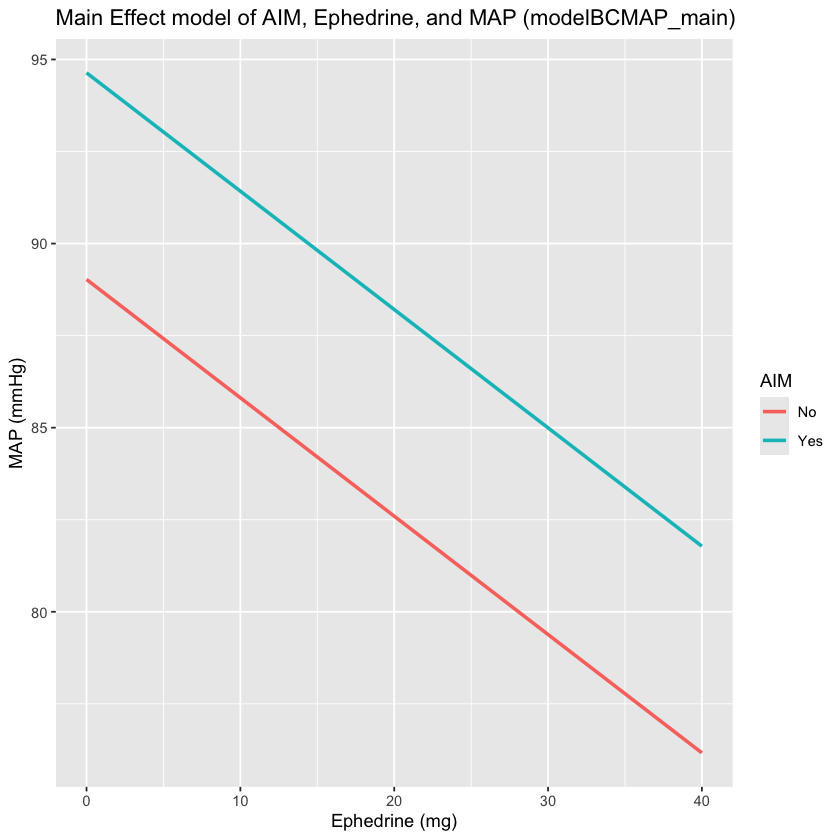

In [8]:
intercept <- 89.02612
slope <- -0.32144
aim_intercept <- 5.61212

x = c(0, 40)
y_non_aim = intercept + slope * x
y_aim = intercept + slope * x + aim_intercept

df = data.frame(
  x = rep(x, 2),
  y = c(y_non_aim, y_aim),
  AIM = rep(c("No", "Yes"), each = length(x))
)

ggplot(df, aes(x = x, y = y, color = AIM)) +
  geom_line(size = 1) +
  labs(
    x = "Ephedrine (mg)",
    y = "MAP (mmHg)",
    title = "Main Effect model of AIM, Ephedrine, and MAP (modelBCMAP_main)",
    color = "AIM"
  )


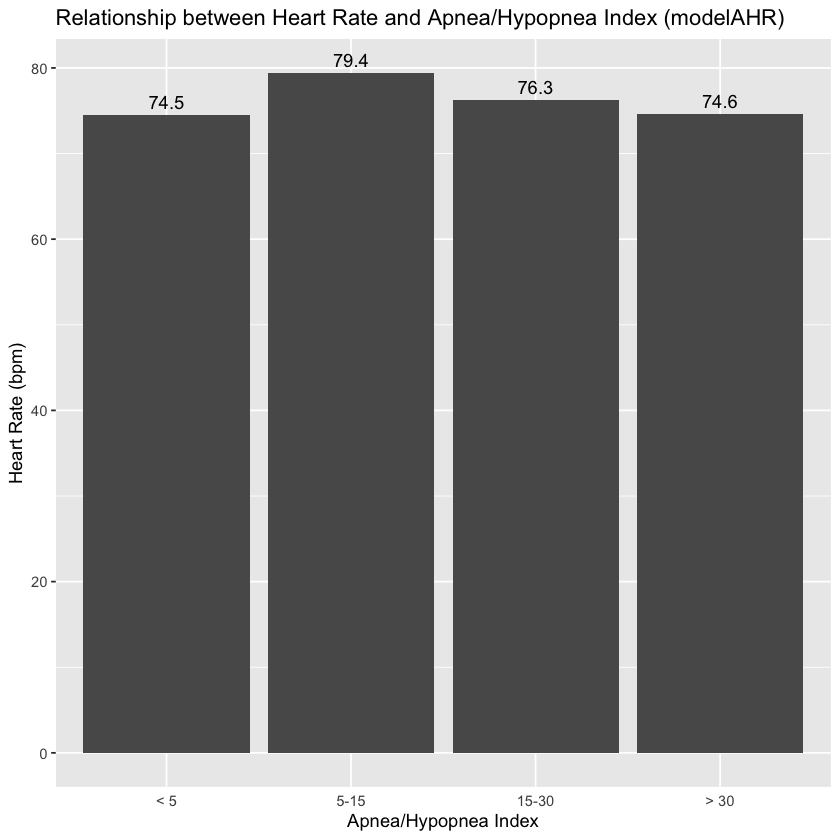

In [9]:
beta_0 = 74.478
beta_1 = 4.955
beta_2 = 1.806
beta_3 = 0.110

df = data.frame(
  x = factor(c("< 5", "5-15", "15-30", "> 30"), levels = c("< 5", "5-15", "15-30", "> 30")),
  y = c(beta_0, beta_0 + beta_1, beta_0 + beta_2, beta_0 + beta_3)
)

ggplot(data=df) +
    geom_bar(aes(x = x, y = y), stat = "identity") +
    geom_text(aes(x = x, y = y, label = round(y, 1)), vjust = -0.5) +
    labs(
        x = "Apnea/Hypopnea Index",
        y = "Heart Rate (bpm)",
        title = "Relationship between Heart Rate and Apnea/Hypopnea Index (modelAHR)"
    ) +
    theme(axis.ticks.x = element_blank())

In [10]:
set.seed(123)
n = 1000

is_grad_student = rep(TRUE, n)
is_broke = as.logical(rbinom(n, 1, 0.85))
owns_car = as.logical(rbinom(n, 1, 0.5))
sex = rep(c("male", "female"), n/2)
mcdonalds_visits_per_annum = rbinom(n, 20, 0.5)

gets_adequate_veggies = ifelse(
    owns_car,
    as.logical(rbinom(n, 1, 0.8)),
    as.logical(rbinom(n, 1, 0.5))
)

avg_hours_sleep = (
    rnorm(n, 8, 1) +
    # grad students are sleep deprived
    (is_grad_student * -3) +
    # some of us can't afford the club
    is_broke * 1
)

sleep_deprivation_index = (
    15 - avg_hours_sleep
)

weight = (
    100 +
    rnorm(n, 0, 10) +
    ifelse(sex == "male", 35, 0) +
    # mcd's has a lrger effect on weight if you don't walk to class
    (mcdonalds_visits_per_annum * owns_car)*2 +
    (mcdonalds_visits_per_annum * (1 - owns_car)) -
    (2*gets_adequate_veggies)
)

depression_index = (
    rnorm(n, 0, 2) +
    (sleep_deprivation_index * 0.5)
)

data = data.frame(
    is_grad_student = is_grad_student,
    is_broke = is_broke,
    owns_car = owns_car,
    sex = sex,
    weight = weight,
    depression_index = depression_index,
    avg_hours_sleep = avg_hours_sleep,
    mcdonalds_visits_per_annum = mcdonalds_visits_per_annum,
    sleep_deprivation_index = sleep_deprivation_index,
    gets_adequate_veggies = gets_adequate_veggies
)


In [12]:
write.csv(data, "data.csv", row.names = FALSE)